# keyu chen
# km5ar

# Lab Assignment 12: Interactive Visualizations
## DS 6001: Practice and Application of Data Science

### Instructions
Please answer the following questions as completely as possible using text, code, and the results of code as needed. Format your answers in a Jupyter notebook. To receive full credit, make sure you address every part of the problem, and make sure your document is formatted in a clean and professional way.

## Problem 0
Import the following libraries:

In [45]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import dash
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

For this lab, we will be working with the 2019 General Social Survey one last time.

In [46]:
%%capture
gss = pd.read_csv("https://github.com/jkropko/DS-6001/raw/master/localdata/gss2018.csv",
                 encoding='cp1252', na_values=['IAP','IAP,DK,NA,uncodeable', 'NOT SURE',
                                               'DK', 'IAP, DK, NA, uncodeable', '.a', "CAN'T CHOOSE"])

Here is code that cleans the data and gets it ready to be used for data visualizations:

In [47]:
mycols = ['id', 'wtss', 'sex', 'educ', 'region', 'age', 'coninc',
          'prestg10', 'mapres10', 'papres10', 'sei10', 'satjob',
          'fechld', 'fefam', 'fepol', 'fepresch', 'meovrwrk'] 
gss_clean = gss[mycols]
gss_clean = gss_clean.rename({'wtss':'weight', 
                              'educ':'education', 
                              'coninc':'income', 
                              'prestg10':'job_prestige',
                              'mapres10':'mother_job_prestige', 
                              'papres10':'father_job_prestige', 
                              'sei10':'socioeconomic_index', 
                              'fechld':'relationship', 
                              'fefam':'male_breadwinner', 
                              'fehire':'hire_women', 
                              'fejobaff':'preference_hire_women', 
                              'fepol':'men_bettersuited', 
                              'fepresch':'child_suffer',
                              'meovrwrk':'men_overwork'},axis=1)
gss_clean.age = gss_clean.age.replace({'89 or older':'89'})
gss_clean.age = gss_clean.age.astype('float')

The `gss_clean` dataframe now contains the following features:

* `id` - a numeric unique ID for each person who responded to the survey
* `weight` - survey sample weights
* `sex` - male or female
* `education` - years of formal education
* `region` - region of the country where the respondent lives
* `age` - age
* `income` - the respondent's personal annual income
* `job_prestige` - the respondent's occupational prestige score, as measured by the GSS using the methodology described above
* `mother_job_prestige` - the respondent's mother's occupational prestige score, as measured by the GSS using the methodology described above
* `father_job_prestige` -the respondent's father's occupational prestige score, as measured by the GSS using the methodology described above
* `socioeconomic_index` - an index measuring the respondent's socioeconomic status
* `satjob` - responses to "On the whole, how satisfied are you with the work you do?"
* `relationship` - agree or disagree with: "A working mother can establish just as warm and secure a relationship with her children as a mother who does not work."
* `male_breadwinner` - agree or disagree with: "It is much better for everyone involved if the man is the achiever outside the home and the woman takes care of the home and family."
* `men_bettersuited` - agree or disagree with: "Most men are better suited emotionally for politics than are most women."
* `child_suffer` - agree or disagree with: "A preschool child is likely to suffer if his or her mother works."
* `men_overwork` - agree or disagree with: "Family life often suffers because men concentrate too much on their work."

## Problem 1
Our goal in this lab is to build a dashboard that presents our findings from the GSS. A dashboard is meant to be shared with an audience, whether that audience is a manager, a client, a potential employer, or the general public. So we need to provide context for our results. One way to provide context is to write text using markdown code.

Find one or two websites that discuss the gender wage gap, and write a short paragraph in markdown code summarizing what these sources tell us. Include hyperlinks to these websites. Then write another short paragraph describing what the GSS is, what the data contain, how it was collected, and/or other information that you think your audience ought to know. A good starting point for information about the GSS is here: http://www.gss.norc.org/About-The-GSS

Then save the text as a Python string so that you can use the markdown code in your dashboard later.

It should go without saying, but no plagiarization! If you summarize a website, make sure you put the summary in your own words. Anything that is copied and pasted from the GSS webpage, Wikipedia, or another website without attribution will receive no credit.

(Don't spend too much time on this, and you might want to skip it during the Zoom session and return to it later so that you can focus on working on code with your classmates.) [1 point]

**Gender Wage Gap**

According to the 2018 Census Bureau, women's median income is 82% of that for men, which means there is an 18% potential gender wage gap. However, there may also be other external factors besides gender. Amongst the reasons for the differences in pay between genders are differences in industries, education, etc. We wish to explore the differences in pay by gender, while controlling for other factors, in order to get a more acute view of the wage gap in context.
(Reference: https://www.americanprogress.org/issues/women/reports/2020/03/24/482141/quick-facts-gender-wage-gap/)


**GSS**

The General Social Survey collects data from Americans on different demographic information, sentiments, and behaviors to track trends over time. The survey has data recorded from 1972. We decided to use the General Social Survey in the following dashboard to compare different attributes, such as occupational prestige and income, for both men and women. (Reference: http://www.gss.norc.org/About-The-GSS)


In [48]:
markdown_text= '''
Gender Wage Gap

According to the 2018 Census Bureau, women's median income is 82% of that for men, which means there is an 18% potential gender wage gap. However, there may also be other external factors besides gender. Amongst the reasons for the differences in pay between genders are differences in industries, education, etc. We wish to explore the differences in pay by gender, while controlling for other factors, in order to get a more acute view of the wage gap in context. (Reference: https://www.americanprogress.org/issues/women/reports/2020/03/24/482141/quick-facts-gender-wage-gap/)


GSS

The General Social Survey collects data from Americans on different demographic information, sentiments, and behaviors to track trends over time. The survey has data recorded from 1972. We decided to use the General Social Survey in the following dashboard to compare different attributes, such as occupational prestige and income, for both men and women. (Reference: http://www.gss.norc.org/About-The-GSS)
'''

## Problem 2
Generate a table that shows the mean income, occupational prestige, socioeconomic index, and years of education for men and for women. Use a function from a `plotly` module to display a web-enabled version of this table. This table is for presentation purposes, so round every column to two decimal places and use more presentable column names. [3 points]

In [49]:
gss_bar = gss_clean.groupby('sex', sort=False).agg({'income':'mean',
                                     'job_prestige':'mean',
                                    'socioeconomic_index':'mean',
                                             'education':'mean'})

gss_bar['income'] = round(gss_bar['income'],2)

gss_bar['job_prestige'] = round(gss_bar['job_prestige'],2)

gss_bar['socioeconomic_index'] = round(gss_bar['socioeconomic_index'],2)

gss_bar['education'] = round(gss_bar['education'],2)

gss_bar = gss_bar.reset_index().rename({'sex':'Sex','income': 'Mean Income', 
                                        'job_prestige': 'Mean Occupational Prestige', 
                                        'socioeconomic_index': 'Mean Socioeconomic Index', 
                                        'education': 'Mean Education Level' }, axis=1)

gss_bar # basical version

,Sex,Mean Income,Mean Occupational Prestige,Mean Socioeconomic Index,Mean Education Level
0,male,53314.63,44.70,47.38,13.69
1,female,47191.02,44.67,46.58,13.76


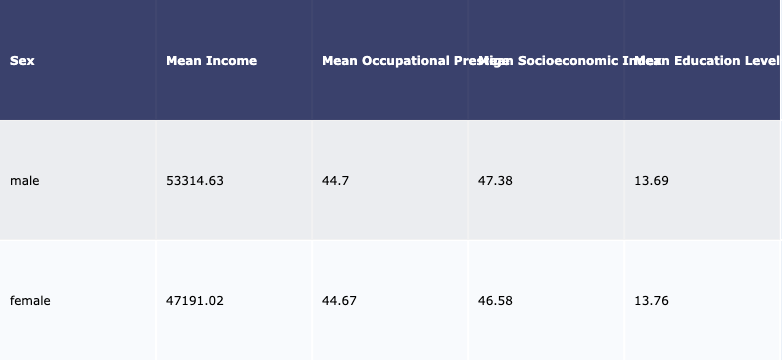

In [50]:
# web enable version of this table
table = ff.create_table(gss_bar)
table.show()

## Problem 3
Create an interactive barplot that shows the number of men and women who respond with each level of agreement to `male_breadwinner`. Write presentable labels for the x and y-axes, but don't bother with a title because we will be using a subtitle on the dashboard for this graphic. [3 points]

In [51]:
gss_bw_group = gss_clean.groupby(['sex', 'male_breadwinner'], sort=False)#.size()
gss_bw = gss_bw_group.size().reset_index() 
gss_bw

,sex,male_breadwinner,0
0,male,disagree,337
1,female,disagree,377
2,female,strongly disagree,286
3,male,strongly disagree,147
4,female,agree,152
5,male,strongly agree,40
6,male,agree,158
7,female,strongly agree,48


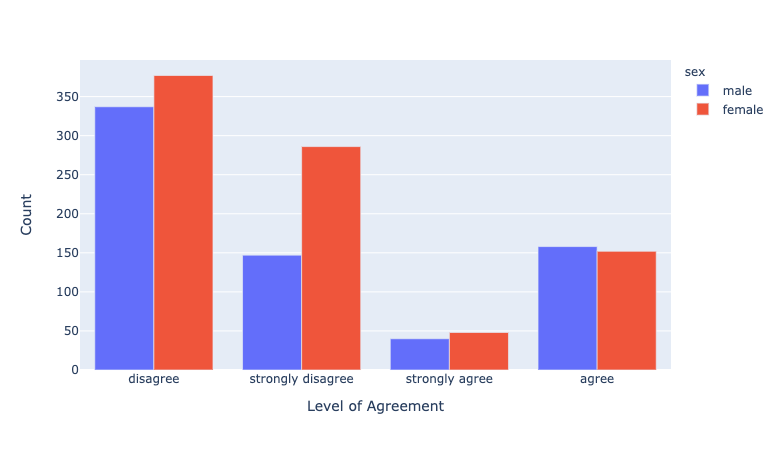

In [52]:
gss_bar=px.bar(gss_bw, x='male_breadwinner', y=0, 
               color='sex', 
               barmode='group', 
               labels={'0':'Count', 'male_breadwinner':'Level of Agreement'})
gss_bar

## Problem 4
Create an interactive scatterplot with `job_prestige` on the x-axis and `income` on the y-axis. Color code the points by `sex` and make sure that the figure includes a legend for these colors. Also include two best-fit lines, one for men and one for women. Finally, include hover data that shows us the values of `education` and `socioeconomic_index` for any point the mouse hovers over. Write presentable labels for the x and y-axes, but don't bother with a title because we will be using a subtitle on the dashboard for this graphic. [3 points]

In [53]:
gss_scatter = gss_clean[~gss_clean.sex.isnull()] # exclus null number in gss_clean sex column

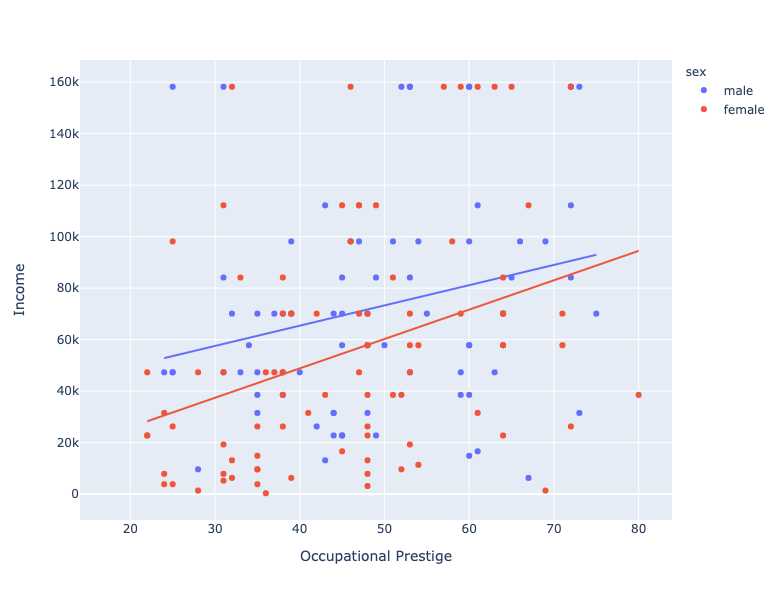

In [54]:
#'lowess'
fig_scatter = px.scatter(gss_scatter.head(200), 
                         x='job_prestige', 
                         y='income', 
                         trendline='ols',
                 color = 'sex', 
                 height=600, width=600,
                 labels={'job_prestige':'Occupational Prestige', 
                        'income':'Income'},
                 hover_data=['sex', 
                             'education', 
                             'socioeconomic_index'])
fig_scatter.update(layout=dict(title=dict(x=0.5)))
fig_scatter.show()

## Problem 5
Create two interactive box plots: one that shows the distribution of `income` for men and for women, and one that shows the distribution of `job_prestige` for men and for women. Write presentable labels for the axis that contains `income` or `job_prestige` and remove the label for `sex`. Also, turn off the legend. Don't bother with titles because we will be using subtitles on the dashboard for these graphics. [3 points]

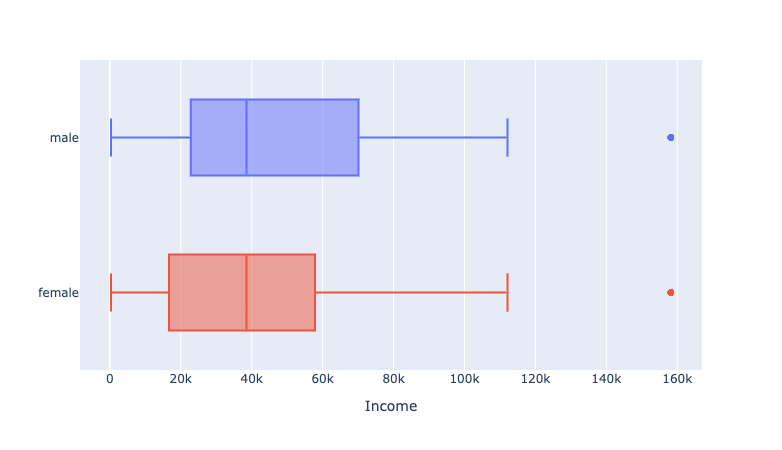

In [55]:
fig_box = px.box(gss_clean, x='income', y = 'sex', color = 'sex',
                   labels={'income':'Income', 'sex':''}, )
fig_box.update_layout(showlegend=False)
fig_box.show()

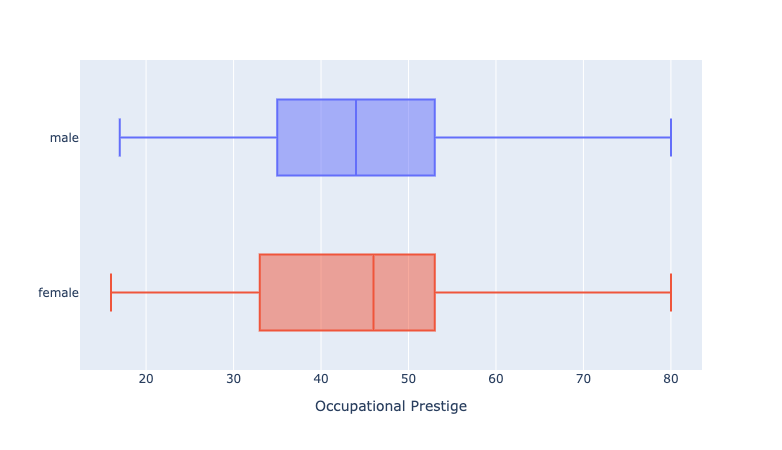

In [56]:
fig_box2 = px.box(gss_clean, 
                  x='job_prestige', 
                  y = 'sex', 
                  color = 'sex',
                   labels={'job_prestige':'Occupational Prestige', 'sex':''})
fig_box2.update_layout(showlegend=False)
fig_box2.show()

## Problem 6
Create a new dataframe that contains only `income`, `sex`, and `job_prestige`. Then create a new feature in this dataframe that breaks `job_prestige` into six categories with equally sized ranges. Finally, drop all rows with any missing values in this dataframe.

Then create a facet grid with three rows and two columns in which each cell contains an interactive box plot comparing the income distributions of men and women for each of these new categories. 

(If you want men to be represented by blue and women by red, you can include `color_discrete_map = {'male':'blue', 'female':'red'}` in your plotting function. Or use different colors if you want!) [3 points]

In [57]:
gss_facet= gss_clean[['income', 'sex', 'job_prestige']]  # subset the data 
gss_facet

,income,sex,job_prestige
0,NaN,male,47.0
1,22782.5000,female,22.0
2,112160.0000,male,61.0
3,158201.8412,female,59.0
4,158201.8412,male,53.0
...,...,...,...
2343,NaN,female,47.0
2344,22782.5000,female,28.0
2345,70100.0000,female,40.0
2346,38555.0000,male,47.0


In [58]:
gss_facet['job_prestige_cat'] = pd.cut(gss_facet.job_prestige, 
                                       bins=[15,26,37,48,59,70,81], 
                                       labels=("16-26","27-37", "38-48", "49-59","60-70","71-81"))

In [59]:
gss_facet=gss_facet.dropna() # drop all rows with any missing values in this dataframe
gss_facet

,income,sex,job_prestige,job_prestige_cat
1,22782.5000,female,22.0,16-26
2,112160.0000,male,61.0,60-70
3,158201.8412,female,59.0,49-59
4,158201.8412,male,53.0,49-59
6,13143.7500,female,48.0,38-48
...,...,...,...,...
2339,38555.0000,female,31.0,27-37
2341,6309.0000,female,49.0,49-59
2344,22782.5000,female,28.0,27-37
2345,70100.0000,female,40.0,38-48


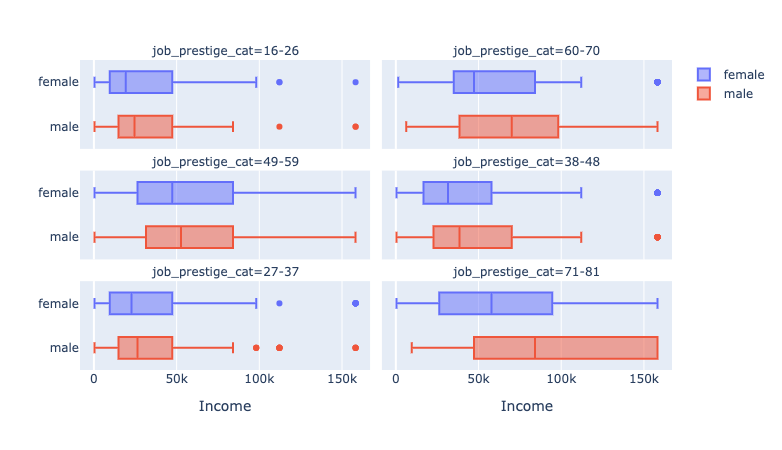

In [60]:
fig_facet = px.box(gss_facet, 
                   x='income', 
                   y='sex', 
                   color='sex', 
             facet_col='job_prestige_cat', 
                   facet_col_wrap=2,
            labels={'income':'Income', 
                    'sex':''})
fig_facet.update(layout=dict(title=dict(x=0.5)))
fig_facet.show()

## Problem 7
Create a dashboard that displays the following elements:

* A descriptive title

* The markdown text you wrote in problem 1

* The table you made in problem 2

* The barplot you made in problem 3

* The scatterplot you made in problem 4

* The two boxplots you made in problem 5 side-by-side

* The faceted boxplots you made in problem 6

* Subtitles for all of the above elements

Use `JupyterDash` to display this dashboard directly in your Jupyter notebook.

Any working dashboard that displays all of the above elements will receive full credit. [4 points]

In [61]:
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div(
    [
        html.H1("Exploring the 2019 General Social Survey: Differences in Sexes"),
        
        dcc.Markdown(children = markdown_text),
        
        html.H4("Table Comparing Mean Income, Occupational Prestige, Socioeconomic Index and Education Level between Men and Women"),
        
        dcc.Graph(figure=table),
        
        html.H4("Barplot Comparing Level of Agreement with the Idea that Males are Breadwinners, between Men and Women"),
        
        dcc.Graph(figure=gss_bar),
        
        html.H4("Scatterplot Comparing Occupational Prestige and Income between Men and Women"),
        
        dcc.Graph(figure=fig_scatter),
        
        html.Div([
            
            html.H5("Boxplot Comparing Income between Men and Women"),
            
            dcc.Graph(figure=fig_box)
            
        ], style = {'width':'48%', 'float':'left'}),
        
        html.Div([
            
            html.H5("Boxplot Comparing Occupational Prestige between Men and Women"),
            
            dcc.Graph(figure=fig_box2)
            
        ], style = {'width':'48%', 'float':'right'}),
        
        html.H4("Boxplots Comparing Income between Men and Women for Occupational Prestige Categories"),
        
        dcc.Graph(figure=fig_facet)
    
    ]
)

if __name__ == '__main__':
    app.run_server(mode='inline', debug=True, port=8050)


## Extra Credit (up to 10 bonus points)
Dashboards are all about good design, functionality, and accessability. For this extra credit problem, create another version of the dashboard you built for problem 7, but take extra steps to improve the appearance of the dashboard, add user-inputs, and host it on the internet with its own URL.

**Challenge 1**: Be creative and use a layout that significantly departs from the one used for the ANES data in the module 12 notebook. A good place to look for inspiration is the [Dash gallery](https://dash-gallery.plotly.host/Portal/). We will award up to 3 bonus points for creativity, novelty, and style.

**Challenge 2**: Alter the barplot from problem 3 to include user inputs. Create two dropdown menus on the dashboard. The first one should allow a user to display bars for the categories of `satjob`, `relationship`, `male_breadwinner`, `men_bettersuited`, `child_suffer`, or `men_overwork`. The second one should allow a user to group the bars by `sex`, `region`, or `education`. After choosing a feature for the bars and one for the grouping, program the barplot to update automatically to display the user-inputted features. One bonus point will be awarded for a good effort, and 3 bonus points will be awarded for a working user-input barplot in the dashboard.

**Challenge 3**: Follow the steps listed in the module notebook to deploy your dashboard on Heroku. 1 bonus point will be awarded for a Heroku link to an app that isn't working. 4 bonus points will be awarded for a working Heroku link.